In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | terrace bay
Processing Record 2 of Set 1 | mildura
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | taburi
City not found. Skipping...
Processing Record 5 of Set 1 | kurilsk
Processing Record 6 of Set 1 | ahipara
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | yeehaw junction
City not found. Skipping...
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | basco
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | vicente guerrero
Pro

Processing Record 33 of Set 4 | port elizabeth
Processing Record 34 of Set 4 | kapaa
Processing Record 35 of Set 4 | ovre ardal
Processing Record 36 of Set 4 | hasaki
Processing Record 37 of Set 4 | puerto ayora
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | egvekinot
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | ixtapa
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | imbituba
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | jibuti
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | sataua
City not found. Skipping...
Processing Record 1 of Set 5 | fort nelson
Processing Record 2 of Set 5 | craig
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | yirol
City not found. Skipping

Processing Record 26 of Set 8 | ponta delgada
Processing Record 27 of Set 8 | qandala
Processing Record 28 of Set 8 | dannenberg
Processing Record 29 of Set 8 | nadym
Processing Record 30 of Set 8 | barra
Processing Record 31 of Set 8 | rialma
Processing Record 32 of Set 8 | orje
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | lawigan
Processing Record 35 of Set 8 | clarence town
Processing Record 36 of Set 8 | anadyr
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | acarau
Processing Record 40 of Set 8 | elko
Processing Record 41 of Set 8 | lohja
Processing Record 42 of Set 8 | san jose de ocoa
Processing Record 43 of Set 8 | tura
Processing Record 44 of Set 8 | emerald
Processing Record 45 of Set 8 | owings mills
Processing Record 46 of Set 8 | kindu
Processing Record 47 of Set 8 | nueva concepcion
Processing Record 48 of Set 8 | sorvag
City not found. Skipping...
Processing Record 49 of Set 8 | bil

Processing Record 10 of Set 12 | muroto
Processing Record 11 of Set 12 | abu kamal
Processing Record 12 of Set 12 | luis gil perez
Processing Record 13 of Set 12 | antalaha
Processing Record 14 of Set 12 | dawei
Processing Record 15 of Set 12 | bonfim
Processing Record 16 of Set 12 | leshukonskoye
Processing Record 17 of Set 12 | griffith
Processing Record 18 of Set 12 | iralaya
Processing Record 19 of Set 12 | mount isa
Processing Record 20 of Set 12 | mandera
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | gat
Processing Record 23 of Set 12 | lagoa
Processing Record 24 of Set 12 | nagorsk
Processing Record 25 of Set 12 | limon
Processing Record 26 of Set 12 | meiganga
Processing Record 27 of Set 12 | thinadhoo
Processing Record 28 of Set 12 | warqla
City not found. Skipping...
Processing Record 29 of Set 12 | reconquista
Processing Record 30 of Set 12 | young
Processing Record 31 of Set 12 | yuksekova
Processing Record 32 of Set 12 | sisimiut
Processing Re

In [10]:
# Check that over 500 cities are in city_data
print(len(city_data))

561


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Terrace Bay,48.7834,-87.1000,30.20,68,20,6.91,CA,2021-03-15 20:17:09
1,Mildura,-34.2000,142.1500,55.00,82,0,5.75,AU,2021-03-15 20:16:41
2,Mataura,-46.1927,168.8643,48.99,92,43,8.99,NZ,2021-03-15 20:17:10
3,Kurilsk,45.2333,147.8833,32.58,98,100,8.63,RU,2021-03-15 20:17:10
4,Ahipara,-35.1667,173.1667,63.72,88,100,3.04,NZ,2021-03-15 20:17:10
5,Hithadhoo,-0.6000,73.0833,83.48,63,91,6.62,MV,2021-03-15 20:17:10
6,Bluff,-46.6000,168.3333,48.99,92,88,8.99,NZ,2021-03-15 20:17:11
7,Severo-Kurilsk,50.6789,156.1250,36.01,98,100,20.71,RU,2021-03-15 20:17:11
8,Cherskiy,68.7500,161.3000,-12.21,78,62,10.56,RU,2021-03-15 20:17:11
9,Basco,20.4487,121.9702,76.59,82,99,19.04,PH,2021-03-15 20:17:11


In [12]:
# Reorder the columns of the city data df.
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Terrace Bay,CA,2021-03-15 20:17:09,48.7834,-87.1000,30.20,68,20,6.91
1,Mildura,AU,2021-03-15 20:16:41,-34.2000,142.1500,55.00,82,0,5.75
2,Mataura,NZ,2021-03-15 20:17:10,-46.1927,168.8643,48.99,92,43,8.99
3,Kurilsk,RU,2021-03-15 20:17:10,45.2333,147.8833,32.58,98,100,8.63
4,Ahipara,NZ,2021-03-15 20:17:10,-35.1667,173.1667,63.72,88,100,3.04
5,Hithadhoo,MV,2021-03-15 20:17:10,-0.6000,73.0833,83.48,63,91,6.62
6,Bluff,NZ,2021-03-15 20:17:11,-46.6000,168.3333,48.99,92,88,8.99
7,Severo-Kurilsk,RU,2021-03-15 20:17:11,50.6789,156.1250,36.01,98,100,20.71
8,Cherskiy,RU,2021-03-15 20:17:11,68.7500,161.3000,-12.21,78,62,10.56
9,Basco,PH,2021-03-15 20:17:11,20.4487,121.9702,76.59,82,99,19.04


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

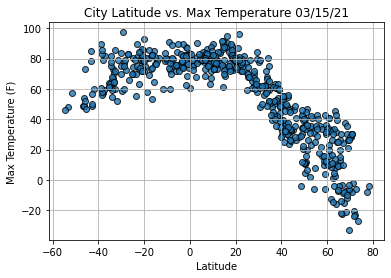

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

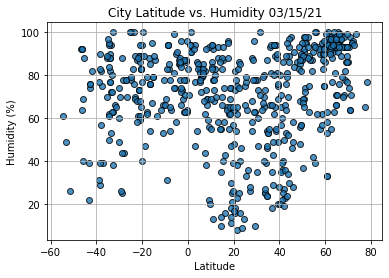

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

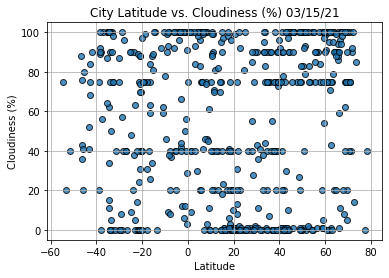

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()